In [1]:
# Libraries:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from toolbox.auxiliary_functions import set_param_freq
from toolbox.symbolic_SINDy import symbolic_SINDy

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


#### Case $\mu$, $A$ and $\omega$ fixed
Consider the modified Van der Pol system with a nonlinear forcing term
$$
\begin{cases}
\dot{x}_0 = \mu x_0 - x_1 - \mu x_0 x_1^2 + A\sin(\omega x_1^2) \\
\dot{x}_1 = x_0
\end{cases}
$$
and with $\mu=1$, $A=1$ and $\omega=1$ fixed.

In [2]:
# Select ODE & settings:
ode_name = 'OscilVdpODE' # help="name of the ode", type=str
ode_param = None # '1.,1.,1.' # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # help="sampling frequency", type=float, default=10
freq_SR = 10 # help="number of trajectories", type=int, default=100
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
seed = 103 # help="random seed", type=int, default=0
n_seed = 1 # help="random seed", type=int, default=10

ode_param, freq = set_param_freq(ode_param, freq)

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
dim_x = 2
dim_k = 0
time_vector = np.arange(0, ode.T + dt, dt)
T = ode.T

In [ ]:
# # Generate data:
# X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k)
# print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
# print(feature_names)

# # Save data:
# file_path = 'saved/data/oscillatingVdpODE_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

In [3]:
# Uploda data:
file_path = 'saved/data/oscillatingVdpODE_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

(50, 100, 2) (50, 100, 2) (0,)
['X0', 'X1']


In [4]:
# Symbolic-SINDy call and fit
model = symbolic_SINDy(SR_method='SR-T', 
                       x_id=0,
                       degree=3,
                       threshold=0.1,
                       product=False)
# model.fit(X_list=X_list, dX_list=dX_list, param_list=param_list,
#           feature_names=feature_names, dt=dt, ode=ode, ode_name=ode_name,
#           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
#           noise_ratio=noise_ratio, seed=seed, n_seed=n_seed, 
#           T0=0, T=T, dim_x=dim_x, dim_k=dim_k)

final_model, building_blocks_lambda, _, _, _, _ =  model.call(X_list=X_list, dX_list=dX_list, param_list=param_list,
           feature_names=feature_names, dt=dt, building_blocks_lambda=None, 
           function_names=None, patience=0, lazy=False, ode=ode, ode_name=ode_name,
           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
           noise_ratio=noise_ratio, seed=seed, n_seed=n_seed, 
           T0=0, T=T, dim_x=dim_x, dim_k=dim_k)


Searching for additonal building blocks -> SR-T call:

Running with: ode_name=OscilVdpODE, ode_param=None, x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=103, n_seed=1
Dataset shape:  (101, 50, 2)
Functions set:  {'neg': 1, 'mul': 1, 'log': 1, 'add': 1, 'sub': 1, 'pow': 1, 'sin': 1, 'cos': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.25      7.06952e+07       11         0.798874         0.768435      1.01m


/home/mattg/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)
/home/mattg/gplearn/gplearn/functions.py:132: RuntimeWarning: overflow encountered in power
  return np.where(np.logical_and(np.minimum(x1, x2) >= 0, np.maximum(x1, x2) <= 10), np.power(x1, x2), 1000)


   1     4.55          261.618        9         0.662531         0.690749      1.07m
   2     4.41          150.008        9         0.659444         0.718531     40.06s
   3     5.59          10766.1        9         0.658215           0.7296     25.72s
   4     5.51          288.617        9         0.649391          0.80901     12.76s
   5     5.89          322.635       11         0.553087         0.563229      0.00s

SR-T model:  -X1 + sin(sin(X1**2 + sin(X0)))

building blocks:
sin(X0 - X1)
sin(X1**2)
X1**1.777960100306823
sin(X1**1.777960100306823)
-X1
sin(sin(X1**2 + sin(X0)))
 
number of building blocks:  6
 

Searching for the best building block:


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(



Best building block:
['sin(X1**2)']

Smart-SINDy model:
(X0)' = 0.976 X0 + -1.000 X1 + -0.973 X0 X1^2 + 0.996 sin(X1**2)
(X1)' = 1.000 X0
Model complexity:  5
Lasso penalty:  4.944729571478914
Total time:  27.799978971481323


#### Plot per report

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def evaluate_traj(model, ode, freq, n_sample, init_high, init_low,
                  dim_x=1, dim_k=1, title=None, T_aux=100):

    # =======================
    # STYLE
    # =======================
    plt.rcdefaults()

    np.random.seed(666)
    dt = 1 / freq
    time_vector = np.arange(0, T_aux + dt, dt)
    t = np.arange(0, T_aux, dt)
    T_plot = len(t)

    # =======================
    # TRUE TRAJECTORIES
    # =======================
    dg_true = data.DataGenerator(
        ode, T_aux, freq, n_sample,
        noise_sigma=0.,
        init_high=init_high,
        init_low=init_low
    )
    xt_true = dg_true.xt

    # =======================
    # ESTIMATED TRAJECTORIES
    # =======================
    pred_0_list = []

    for i in range(n_sample):
        correct_param = xt_true[0, i, -dim_k:]
        test_params = np.tile(correct_param, (T_plot, 1))

        if dim_k != 0:
            pred_0 = model.simulate(
                xt_true[0, i, :-dim_k],
                t=t[:T_plot],
                u=test_params
            )
        else:
            pred_0 = model.simulate(
                xt_true[0, i],
                t=t[:T_plot]
            )

        pred_0_list.append(pred_0)

    # =======================
    # RESHAPE
    # =======================
    xt_true = xt_true[:len(pred_0), :, :]
    time_vector = time_vector[:len(pred_0)]

    if dim_k != 0:
        xt_true = xt_true[:, :, :-dim_k]

    xt_true = xt_true.squeeze()
    pred_0_list = np.transpose(pred_0_list, (1, 0, 2)).squeeze()

    # =======================
    # PLOTTING
    # =======================
    if n_sample == 1:

        # ---------- dim_x = 1 ----------
        if dim_x == 1:

            fig, ax = plt.subplots(1, 1, figsize=(5, 4))

            ax.plot(time_vector, pred_0_list,
                    lw=1.5, color='blue', alpha=0.8,
                    label='Estimated trajectory')

            ax.plot(time_vector, xt_true,
                    lw=1.5, color='red', linestyle='--',
                    label='True trajectory')

            ax.scatter(time_vector[0], xt_true[0],
                       s=30, color='green', zorder=3,
                       label='Start')

            ax.scatter(time_vector[-1], xt_true[-1],
                       s=30, color='red', zorder=3,
                       label='End')

            ax.set_xlabel(r"$t$")
            ax.set_ylabel(r"$x(t)$")

            if title:
                ax.set_title(title)

            ax.grid(True, alpha=0.3)
            ax.legend(fontsize=9, frameon=False, loc='lower right')

            plt.tight_layout()
            plt.show()

        # ---------- dim_x = 2 (PHASE SPACE) ----------
        elif dim_x == 2:

            fig, ax = plt.subplots(1, 1, figsize=(5, 4.3))

            ax.plot(pred_0_list[:, 0], pred_0_list[:, 1],
                    lw=1.5, color='blue', alpha=0.8,
                    label='Estimated trajectory')

            ax.plot(xt_true[:, 0], xt_true[:, 1],
                    lw=1.5, color='red', linestyle='--',
                    label='True trajectory')

            ax.scatter(xt_true[0, 0], xt_true[0, 1],
                       s=30, color='green', zorder=3,
                       label='Start')

            ax.scatter(xt_true[-1, 0], xt_true[-1, 1],
                       s=30, color='red', zorder=3,
                       label='End')

            ax.set_xlabel(r"$x_1$")
            ax.set_ylabel(r"$x_2$")

            if title:
                ax.set_title(title)

            ax.grid(True, alpha=0.3)
            ax.legend(
            fontsize=9,
            loc='lower right',
            frameon=True,
            framealpha=0.8,
            facecolor='white',
            edgecolor='0.8'
            )


            plt.tight_layout()
            plt.show()

        # ---------- dim_x = 3 ----------
        else:

            fig, ax = plt.subplots(
                figsize=(6, 6),
                subplot_kw={'projection': '3d'}
            )

            ax.plot(pred_0_list[:, 0],
                    pred_0_list[:, 1],
                    pred_0_list[:, 2],
                    lw=1.5, color='blue', alpha=0.8,
                    label='Estimated trajectory')

            ax.plot(xt_true[:, 0],
                    xt_true[:, 1],
                    xt_true[:, 2],
                    lw=1.5, color='red', linestyle='--',
                    label='True trajectory')

            ax.scatter(xt_true[0, 0], xt_true[0, 1], xt_true[0, 2],
                       s=30, color='green', label='Start')

            ax.scatter(xt_true[-1, 0], xt_true[-1, 1], xt_true[-1, 2],
                       s=30, color='red', label='End')

            ax.set_xlabel(r"$x$")
            ax.set_ylabel(r"$y$")
            ax.set_zlabel(r"$z$")

            if title:
                ax.set_title(title)

            ax.legend(fontsize=9, frameon=False, loc='lower right')
            plt.tight_layout()
            plt.show()


Best Model RMSE:  0.03133001730368438


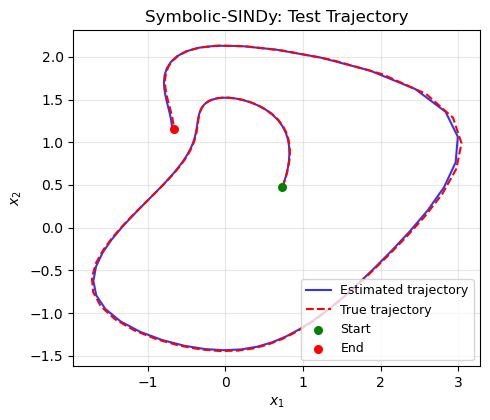

In [6]:
# Evaluation: within the training -> RMSE and reconstruction
n_test = 10
rmse, _ = SINDy_data.evaluate_RMSE(final_model, ode, freq, n_test, [1., 1.], [0., 0.], dim_k)
print('Best Model RMSE: ', rmse)

evaluate_sample = 1
ics = [0.7, 0.4]
title = 'Symbolic-SINDy: Test Trajectory'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=10)

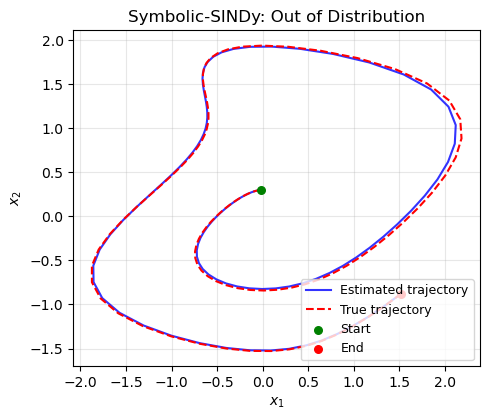

In [7]:
# Evaluation: outside the training set
evaluate_sample = 1
ics = [0, 0.3]
title = 'Symbolic-SINDy: Out of Distribution'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=10)

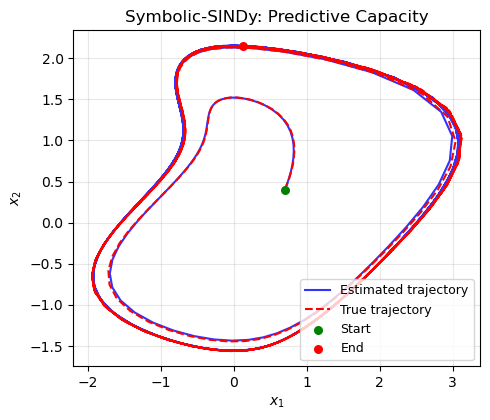

In [8]:
# Evaluation: Generalization for unseen time
evaluate_sample = 1
ics = [0.7, 0.4]
title = 'Symbolic-SINDy: Predictive Capacity'
evaluate_traj(final_model, ode, freq, evaluate_sample, ics, ics, dim_x, dim_k, title=title, T_aux=40)